In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


full_data = pd.read_csv('all_breakdown.csv')
display(full_data.head(24))
full_data.info()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0
5,2011-07-21 05:00:00,177.0,371.0,980.0,6.0,510.0,0.0,NaN,NaN,1406.0
6,2011-07-21 06:00:00,176.0,372.0,979.0,7.0,521.0,10.0,NaN,NaN,1391.0
7,2011-07-21 07:00:00,176.0,378.0,977.0,8.0,524.0,84.0,NaN,NaN,1341.0
8,2011-07-21 08:00:00,176.0,380.0,975.0,9.0,526.0,169.0,NaN,NaN,1220.0
9,2011-07-21 09:00:00,175.0,381.0,973.0,10.0,528.0,254.0,NaN,NaN,1025.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 10 columns):
TIMESTAMP        67584 non-null object
BIOGAS           67584 non-null float64
BIOMASS          67584 non-null float64
GEOTHERMAL       67584 non-null float64
Hour             67584 non-null float64
SMALL HYDRO      67584 non-null float64
SOLAR            22680 non-null float64
SOLAR PV         44904 non-null float64
SOLAR THERMAL    44904 non-null float64
WIND TOTAL       67584 non-null float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB


In [4]:
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 10 columns):
TIMESTAMP        67584 non-null object
BIOGAS           67584 non-null float64
BIOMASS          67584 non-null float64
GEOTHERMAL       67584 non-null float64
Hour             67584 non-null float64
SMALL HYDRO      67584 non-null float64
SOLAR            67584 non-null float64
SOLAR PV         67584 non-null float64
SOLAR THERMAL    67584 non-null float64
WIND TOTAL       67584 non-null float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB


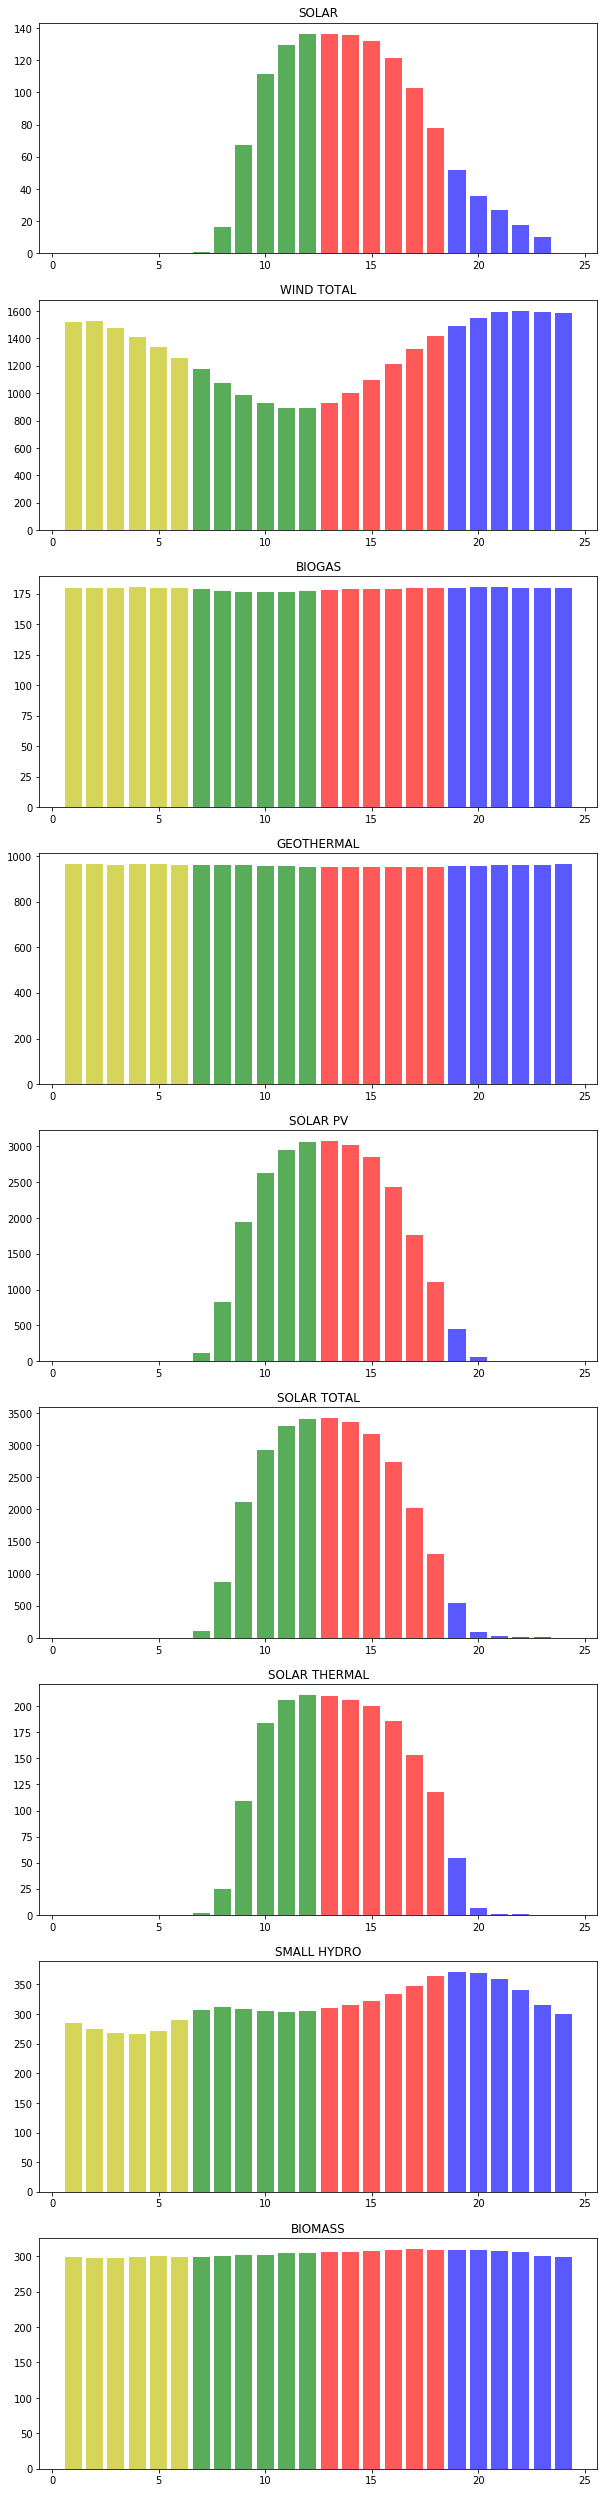

In [5]:
import seaborn as sns
full_data['SOLAR TOTAL'] = full_data['SOLAR']+full_data['SOLAR PV']+full_data['SOLAR THERMAL']

#display(full_data.head())
hour_grouped = full_data.groupby('Hour')
solar_hour = pd.DataFrame(hour_grouped['SOLAR'].mean())
solar_hour['WIND TOTAL'] = hour_grouped['WIND TOTAL'].mean()
solar_hour['BIOGAS'] = hour_grouped['BIOGAS'].mean()
solar_hour['GEOTHERMAL'] = hour_grouped['GEOTHERMAL'].mean()
solar_hour['SOLAR PV'] = hour_grouped['SOLAR PV'].mean()
solar_hour['SOLAR TOTAL'] = hour_grouped['SOLAR TOTAL'].mean()
solar_hour['SOLAR THERMAL'] = hour_grouped['SOLAR THERMAL'].mean()
solar_hour['SMALL HYDRO'] = hour_grouped['SMALL HYDRO'].mean()
solar_hour['BIOMASS'] = hour_grouped['BIOMASS'].mean()
quarter = solar_hour.reset_index().loc[:,'Hour'] // 4

color = ['y','g','r','b']
colors = []
for j in range(4):
    for i in range(6):
        colors.append(color[j])
#display(solar_hour.head())
#print(solar_hour.columns)

num_rows = len(solar_hour.columns)
plt.figure(figsize=(10,num_rows*5))
for i in range(len(solar_hour.columns)):
    y = np.array(solar_hour.loc[:,solar_hour.columns[i]])
    x = np.array(solar_hour.reset_index().loc[:,'Hour'])
    plt.subplot(num_rows,1,i+1)
    plt.bar(x,y,color=colors,alpha=.65)
    plt.title(solar_hour.columns[i])

plt.show()

#plot = sns.lineplot(solar_hour['Hour'],solar_hour['SOLAR'])
#plt.show()

#plot = sns.barplot(x='Hour',y='SOLAR',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='WIND TOTAL',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='BIOGAS',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='GEOTHERMAL',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='SOLAR PV',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

In [6]:
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])

In [7]:
full_data['MONTH'] = full_data['TIMESTAMP'].dt.month
full_data['YEAR'] = full_data['TIMESTAMP'].dt.year
full_data['DAY'] = full_data['TIMESTAMP'].dt.day
full_data.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL,SOLAR TOTAL,MONTH,YEAR,DAY
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,0.0,0.0,1607.0,0.0,7,2011,21
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,0.0,0.0,1619.0,0.0,7,2011,21
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,0.0,0.0,1660.0,0.0,7,2011,21
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,0.0,0.0,1633.0,0.0,7,2011,21
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,0.0,0.0,1520.0,0.0,7,2011,21


SOLAR        Wind
MONTH Hour                   
4     1.0     0.0  800.636364
      2.0     0.0  773.909091
      3.0     0.0  762.090909
      4.0     0.0  759.090909
      5.0     0.0  716.090909

<Figure size 864x216 with 0 Axes>

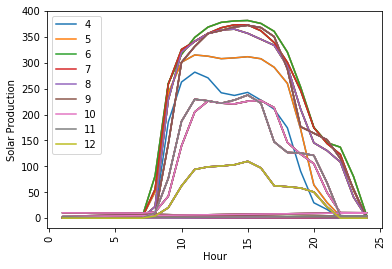

In [8]:
year_month = full_data.groupby(['YEAR','MONTH','Hour'])
solar_y_m = pd.DataFrame(year_month['SOLAR'].mean())
solar_y_m['Wind'] = year_month['WIND TOTAL'].mean()
#solar_y_m['Error'] = year_month['SOLAR'].sem()
solar_y_m.head()
test = solar_y_m.loc[2010]
display(test.head())

test2 = test.loc[4].reset_index()

plt.figure(figsize=(12,3))
fig, ax = plt.subplots()
for i in test.reset_index()['MONTH'].unique():
    data = test.loc[i:].reset_index()
    ax.plot(data['Hour'],data['SOLAR'],label=i)

    
plt.xticks(rotation=90)
plt.legend()
plt.xlabel("Hour")
plt.ylabel("Solar Production")
plt.show()

#plots = sns.barplot(x='Hour', y='Wind', data=test2)

C:\Users\Scottinsacto\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


hello world


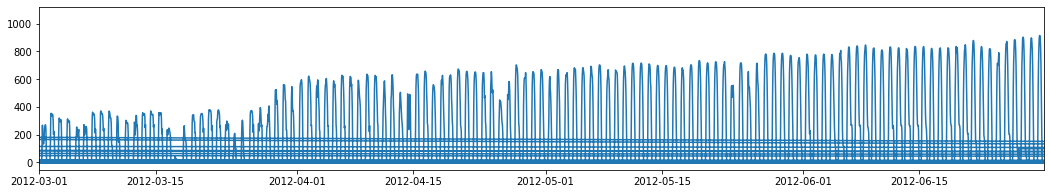

In [9]:
plt.figure(figsize=(18,3))
plt.plot(full_data['TIMESTAMP'],full_data['SOLAR'])
plt.xlim(pd.to_datetime('03/01/12'),pd.to_datetime('6/30/12'))

print("hello world")

In [1]:
#this is a test cell
#also I made a minor edit (print "hello world") in the previous cell
#so you can test merging edits
greeting = "hello world"
print (greeting)

hello world
